Thư viện Machine Learning và phân tích dữ liệu

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Tải dữ liệu
from google.colab import files
files.upload()    # ads_data.csv

Saving ads_data.csv to ads_data.csv


{'ads_data.csv': b'Advertising Cost (USD),Sales Revenue (USD)\n784,5167.683485453761\n659,4736.040926226243\n729,4799.105661803958\n292,2307.039663115264\n935,5917.849077653243\n863,5753.385394999056\n807,5348.687785701726\n459,3390.113448871024\n109,841.3006619800116\n823,5324.660475913609\n377,2713.5700971514793\n854,5926.8782567448025\n904,5857.388519711735\n699,4703.47296345806\n170,1812.548089489681\n572,4239.005825823837\n700,4813.288007605864\n496,3505.853018342467\n414,2768.344399483382\n805,5609.094454061213\n586,4373.4968091126\n651,4292.096547221851\n187,1657.0773065338424\n274,2051.4988921127856\n700,4482.839880904874\n949,6321.947198987094\n777,5084.827332711381\n637,4166.847529325185\n945,6369.142269729411\n172,1145.3590441185768\n877,5811.706125485938\n215,1783.7509329152097\n855,5602.105207502065\n809,5315.8688041574715\n947,6271.727505498107\n'}

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('ads_data.csv')
df

,Advertising Cost (USD),Sales Revenue (USD)
0,784,5167.683485
1,659,4736.040926
2,729,4799.105662
3,292,2307.039663
4,935,5917.849078
5,863,5753.385395
6,807,5348.687786
7,459,3390.113449
8,109,841.300662
9,823,5324.660476


Scatterplot để biểu diễn mối quan hệ giữa 2 bên

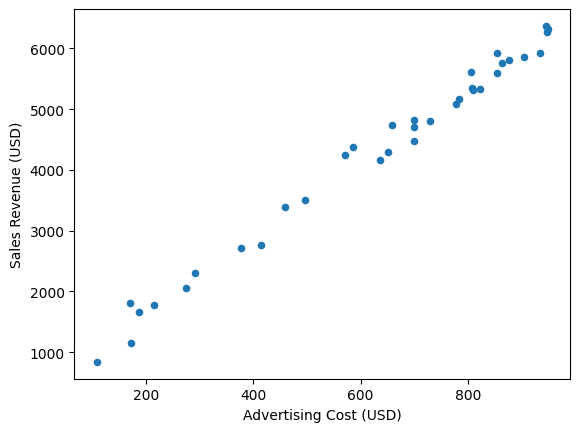

In [ ]:
df.plot.scatter(
    x = 'Advertising Cost (USD)',
    y = 'Sales Revenue (USD)'
)
plt.show()

# **Hồi quy tuyến tính - Linear Regression**

**Hồi quy tuyến tính** là 1 phương pháp mô tả mối quan hệ tuyến tính giữa 2 bên

Đường hồi quy tuyến tính là **đường thẳng khớp nhất với tất cả các điểm dữ liệu**

Công thức: y = ax + b

Trong đó:
* x là biến độc lập
* y là biến phụ thuộc
* a là độ dốc (slope)
* b là hệ số chặn (intercept)

**Tương quan (correlation)** chỉ độ mạnh yếu của mối quan hệ giữa các giá trị

Hệ số tương quan (corr) nằm trong khoảng từ -1 đến 1:
* corr = 1: cả 2 biến tăng cùng nhau
* corr = -1:  một biến tăng, một biến giảm
* corr = 0: không có mối tương quan tuyến tính

In [ ]:
# corr(): tính hệ số tương quan giữa 2 Series
df['Sales Revenue (USD)'].corr(df['Advertising Cost (USD)'])

0.9940740630509901

**Áp dụng mô hình tuyến tính**

3 bước: Tạo mô hình - Xác định biến - Huyến luyện mô hình

In [ ]:
# Tạo mô hình
model = LinearRegression()

# Xác định biến
    # x là Advertising Cost
x = df.iloc[:, 0:1]   # iloc[:, 0:1]: trả về 1 DataFrame với toàn bộ hàng và chỉ lấy cột đầu tiên
    # y là Sales Revenue
y = df.iloc[:, 1:2]   # iloc[:, 0:2]: trả về 1 DataFrame với toàn bộ hàng và chỉ lấy cột thứ 2

# Huấn luyện mô hình
model.fit(x,y)

LinearRegression()

In [ ]:
# Tìm độ dốc (coef) - biến a trong y = ax + b
model.coef_

array([[6.14733189]])

In [ ]:
# Tìm hệ số chặn (intercept) - biến b trong y = ax + b
model.intercept_

array([423.64529827])

# **Best of Fit**

Mô tả mức độ phù hợp của mô hình với dữ liệu thực tế (đường best of fit càng gần với các điểm dữ liệu thì càng phù hợp)

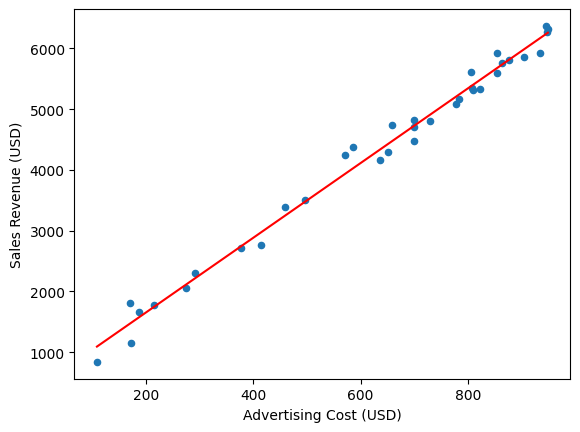

In [ ]:
# Sử dụng lại Scatter Plot ở trên
df.plot.scatter(
    x="Advertising Cost (USD)",
    y="Sales Revenue (USD)"
)

# Tạo 1 mảng x từ nhỏ nhất đến lớn nhất (x của đường hồi quy - best of fit)
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
    # model.coef_[0] * X_line: tính các giá y tương ứng với x đã tạo
y_line = model.intercept_ + model.coef_[0] * x_line

# Vẽ đường hồi quy tuyến tính trên biểu đồ
plt.plot(x_line, y_line, color='red', label='Best fit line')
plt.show()

In [ ]:
# Dự đoán doanh thu khi chi phí quảng cáo là 600 USD
model.predict(pd.DataFrame([600]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4112.04443118]])

# **Train - Test - Đánh giá hiệu quả**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# train_test_split được sử dụng để chia dữ liệu thành hai tập:
          # tập huấn luyện (training set): được sử dụng để huấn luyện mô hình
          # tập kiểm tra (test set): được sử dụng để đánh giá mô hình, kiểm tra mức dộ khái quát
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    # x: dữ liệu đầu vào (features)
    # y: nhãn/tên bảng, giá trị mục tiêu (labels/targets)
    # test_size: tỉ lệ của tập kiểm tra (0.2 nghĩa là 20% dữ liệu sẽ thuộc tập kiểm tra)
    # random_state: giá trị cố định việc chia dữ liệu (nên để nguyên)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 1) (28, 1)
(7, 1) (7, 1)


In [ ]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = new_model.predict(x_test)

In [ ]:
# Tìm hệ số a, b
new_model.intercept_, new_model.coef_

(array([477.1814076]), array([[6.07996297]]))

In [ ]:
# mean_squared_error:
    # Đánh giá hiệu suất mô hình
    # Đo lường mức độ chêch lệch giữa thực tế (y_test) và dự đoán (y_pred) bằng cách tính trung bình của bình phương các sai số
mse = mean_squared_error(y_test, y_pred)
mse

53852.56448015925

In [ ]:
# r2_score:
    # Đánh giá mức độ khớp của mô hình với dữ liệu
    # Thể hiện tỉ lệ phần trăm chính xác của dự đoán so với thực tế
r2 = r2_score(y_test, y_pred)
r2      # r2 = 0.9696 có nghĩa là dự đoán đúng 96.96% so với thực tế

0.9696953486116257